In [1]:
import pandas as pd
import random
from KNNClassifier import KNNClassifier
from metrics import score

In [2]:
dataframe = pd.read_csv(r"datasets/reviews_sentiment.csv",sep=';')
dataframe = dataframe[['wordcount', 'titleSentiment', 'sentimentValue', 'Star Rating']]

def titleSentimentEmbedding(ts):
    if ts == 'negative':
        return 0
    elif ts == 'positive':
        return 1
    else:
        return 0.5
    
dataframe = dataframe.transform({ 
    'wordcount': lambda x: x,
    'sentimentValue': lambda x: x,
    'Star Rating': lambda x: x,
    'titleSentiment': titleSentimentEmbedding
})

In [3]:
dataframe.head()

,wordcount,sentimentValue,Star Rating,titleSentiment
0,23,-0.486389,1,0.0
1,20,-0.586187,1,0.0
2,4,-0.602240,1,0.5
3,17,-0.616271,1,0.5
4,6,-0.651784,1,0.0


Mean wordcount:  12.216216216216216


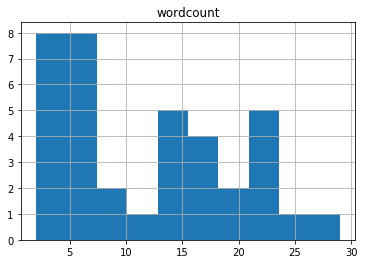

In [4]:
one_star = dataframe[dataframe['Star Rating']==1]
one_star.hist(column = 'wordcount')
print(f"Mean wordcount: ", one_star['wordcount'].mean())

In [5]:
x = dataframe[['wordcount', 'titleSentiment', 'sentimentValue']].values.tolist()
y = list(map(lambda x: x[0], dataframe[['Star Rating']].values.tolist()))

In [12]:
TRAIN_SIZE = 0.3
K = 5

In [7]:
# Sample
c = list(zip(x, y))
random.seed(0)
random.shuffle(c)
x, y = zip(*c)
lim = int(TRAIN_SIZE * len(x))

x_train = x[:lim]
x_test = x[lim:]
y_train = y[:lim]
y_test = y[lim:]

print("Train size:", len(x_train))
print("Test size:", len(x_test))

Train size: 205
Test size: 52


In [13]:
knn = KNNClassifier(K = K)
knn.fit(x_train, y_train)

* Class: 1
Accuracy 0.86538 | Precision 0.40000 | Recall 0.33333 | TP-rate 0.33333 | FP-rate 0.06522 | F1 0.36364 

* Class: 2
Accuracy 0.94231 | Precision 0.66667 | Recall 0.80000 | TP-rate 0.80000 | FP-rate 0.04255 | F1 0.72727 

* Class: 3
Accuracy 0.76923 | Precision 0.64286 | Recall 0.56250 | TP-rate 0.56250 | FP-rate 0.13889 | F1 0.60000 

* Class: 4
Accuracy 0.80769 | Precision 0.50000 | Recall 0.50000 | TP-rate 0.50000 | FP-rate 0.11905 | F1 0.50000 

* Class: 5
Accuracy 0.92308 | Precision 0.82353 | Recall 0.93333 | TP-rate 0.93333 | FP-rate 0.08108 | F1 0.87500 

HARMONIC MEANS

    Accuracy: 0.85643
    Precision: 0.57014
    Recall: 0.54950
    TP rate: 0.54950
    FP rate: 0.07489
    F1 score: 0.55963


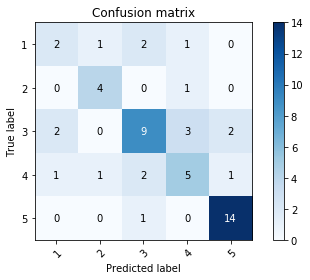

In [11]:
score(knn, x_test, y_test, classes = [1,2,3,4,5], confusion_matrix=True)

* Class: 1
Accuracy 0.88462 | Precision 0.50000 | Recall 0.33333 | TP-rate 0.33333 | FP-rate 0.04348 | F1 0.40000 

* Class: 2
Accuracy 0.94231 | Precision 0.62500 | Recall 1.00000 | TP-rate 1.00000 | FP-rate 0.06383 | F1 0.76923 

* Class: 3
Accuracy 0.78846 | Precision 0.66667 | Recall 0.62500 | TP-rate 0.62500 | FP-rate 0.13889 | F1 0.64516 

* Class: 4
Accuracy 0.88462 | Precision 0.83333 | Recall 0.50000 | TP-rate 0.50000 | FP-rate 0.02381 | F1 0.62500 

* Class: 5
Accuracy 0.88462 | Precision 0.73684 | Recall 0.93333 | TP-rate 0.93333 | FP-rate 0.13514 | F1 0.82353 

HARMONIC MEANS

    Accuracy: 0.87400
    Precision: 0.65299
    Recall: 0.57661
    TP rate: 0.57661
    FP rate: 0.05248
    F1 score: 0.61242


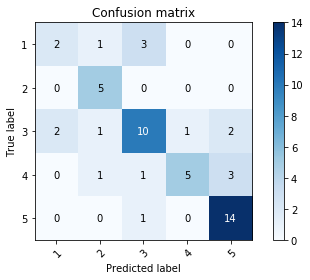

In [14]:
knn_weighted = KNNClassifier(K = K, weight_f='euclidean')
knn_weighted.fit(x_train, y_train)
score(knn_weighted, x_test, y_test, classes = [1,2,3,4,5], confusion_matrix=True)

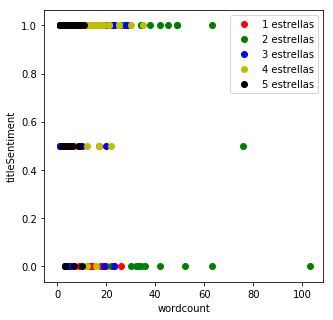

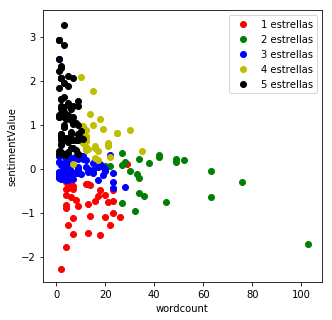

In [ ]:
import matplotlib.pyplot as plt

pairs = [
    ['wordcount', 'titleSentiment'],
    ['wordcount', 'sentimentValue'],
    ['titleSentiment', 'sentimentValue']
]

for pair in pairs:
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    for i, m, cl in [(1, 'o', 'red'), (2, 'o', 'g'), (3, 'o', 'b'), (4, 'o', 'y'), (5, 'o', 'k')]:
        filtered = dataframe[dataframe['Star Rating']==i]
        xy = filtered[pair].values.tolist()
        xs = [v[0] for v in xy]
        ys = [v[1] for v in xy]
        ax.scatter(xs, ys, c=cl, label = f'{i} estrellas')
        ax.legend(loc = 'best')
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])

plt.show()

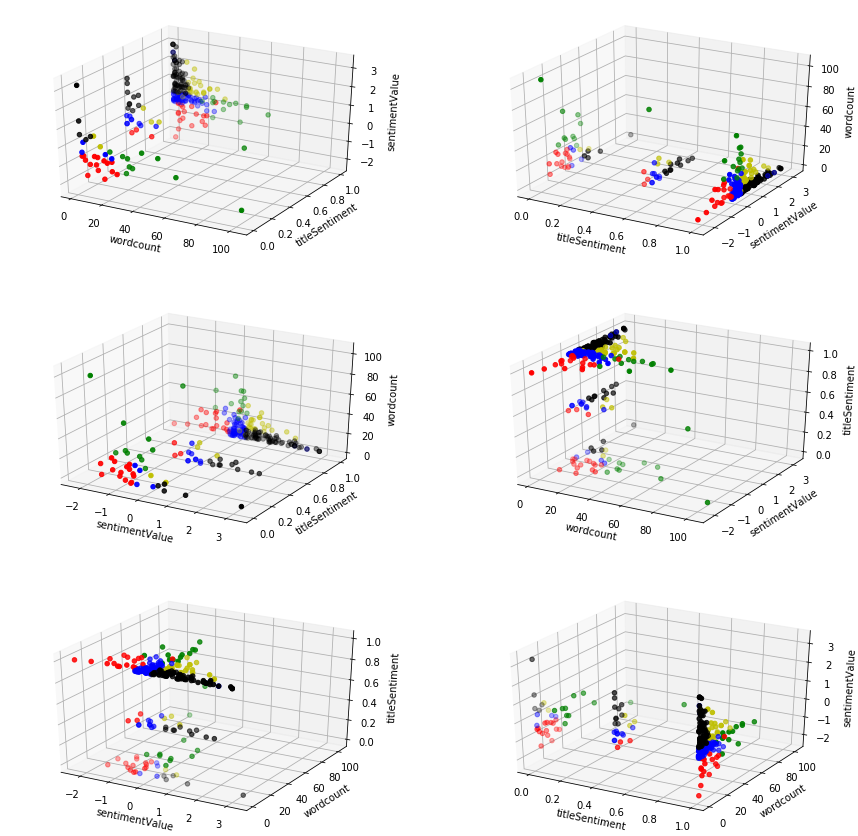

In [86]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))
subplots = [321, 322, 323, 324, 325, 326]
dimensions = ['wordcount', 'titleSentiment', 'sentimentValue']
j = 0
for p in [[0,1,2], [1,2,0], [2,1,0], [0,2,1], [2,0,1], [1,0,2]]:
    ax = fig.add_subplot(subplots[j], projection='3d')
    j += 1
    for i, m, cl in [(1, 'o', 'red'), (2, 'o', 'g'), (3, 'o', 'b'), (4, 'o', 'y'), (5, 'o', 'k')]:
        filtered = dataframe[dataframe['Star Rating']==i]
        xyz = filtered[dimensions].values.tolist()
        xs = [v[p[0]] for v in xyz]
        ys = [v[p[1]] for v in xyz]
        zs = [v[p[2]] for v in xyz]
        ax.scatter(xs, ys, zs, c=cl)

    ax.set_xlabel(dimensions[p[0]])
    ax.set_ylabel(dimensions[p[1]])
    ax.set_zlabel(dimensions[p[2]])

plt.show()